# Analytical estimate of wave induced melting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as itgr

## Change in average ice-parallel velocity due to internal waves

Mean vertial velocity = 0.000 m/s
Mean horizontal velocity = 0.050 m/s
Peak wave vertical velocity = 0.050 m/s
Peak horizontal velocity = 0.044 m/s
Change in time average velocity = 28.45%


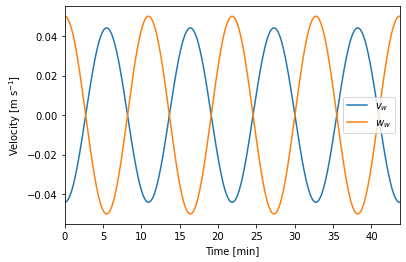

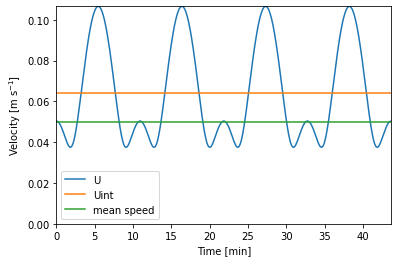

In [2]:
nperiods = 4  # Number of wave periods to plot/integrate

W = 0.00  # Mean vertical flow m/s
V = 0.05 # Mean flow velocity m/s
w0 = 0.05  # Wave vertical velocity amplitude m/s
N = 1e-2  # Buoynacy frequency rad/s ( 1e-2 rad s-1 is about 140 cpd)
om0 = 0.75*N  # intrinsic wave frequency rad / s
ky = np.pi*2/150  # horizontal wavenumber rad / m

v0 = -np.sqrt(N**2 / om0**2 - 1)*w0  # Wave horizontal velocity amplitude from IW dispersion relation
om = om0 + V*ky  # Eulerian frequency

t = np.linspace(0, nperiods*np.pi*2/om, 500)

# Wave velocity as a function of time
ww = w0*np.cos(om*t)
vw = v0*np.cos(om*t)

fig, ax = plt.subplots(1, 1)
ax.plot(t/60, vw, label="$v_w$")
ax.plot(t/60, ww, label="$w_w$")
ax.legend()
ax.set_ylabel("Velocity [m s$^{-1}$]")
ax.set_xlabel("Time [min]")
ax.set_xlim(t[0]/60, t[-1]/60)

mspd = (V**2 + W**2)**0.5
U = np.sqrt((V + vw)**2 + (W + ww)**2)  # np.abs(V + vw)

Uint = itgr.simpson(U, t)/(t[-1] - t[0])

fig, ax = plt.subplots()
ax.plot(t/60, U, label="U")
ax.axhline(Uint, color="C1", label="Uint")
ax.axhline(mspd, color="C2", label="mean speed")
ax.set_xlim(t[0]/60, t[-1]/60)
ax.set_ylim(0, U.max())
ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Velocity [m s$^{-1}$]")

print(f"Mean vertial velocity = {W:1.3f} m/s")
print(f"Mean horizontal velocity = {V:1.3f} m/s")
print(f"Peak wave vertical velocity = {np.abs(w0):1.3f} m/s")
print(f"Peak horizontal velocity = {np.abs(v0):1.3f} m/s")
print(f"Change in time average velocity = {Uint/mspd-1:1.2%}")